## Data set reference

**Link:https://github.com/loem-ms/PatternRecognition/tree/master/dataset**

# Import libraries

In [52]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

## Load data set folder 

In [53]:
dataset_path = "../dataset"

## Get all class folder from data set

In [54]:
classes = sorted(os.listdir(dataset_path))
print(f"Number of classes: {len(classes)}")
print(f"Class names: {classes}")

Number of classes: 10
Class names: ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']


## Count total images and per-class distribution

In [55]:
total_images = 0
class_count = []

for cls in classes:
    class_path = os.path.join(dataset_path, cls)
    count = len(os.listdir(class_path))
    class_count.append(count)
    total_images += count
    print(f"Class {cls}: {count} images")

print(f"Total images in dataset: {total_images}")

Class 0: 300 images
Class 1: 300 images
Class 2: 300 images
Class 3: 300 images
Class 4: 300 images
Class 5: 300 images
Class 6: 300 images
Class 7: 300 images
Class 8: 300 images
Class 9: 300 images
Total images in dataset: 3000


# 1. Class Distribution Visualization

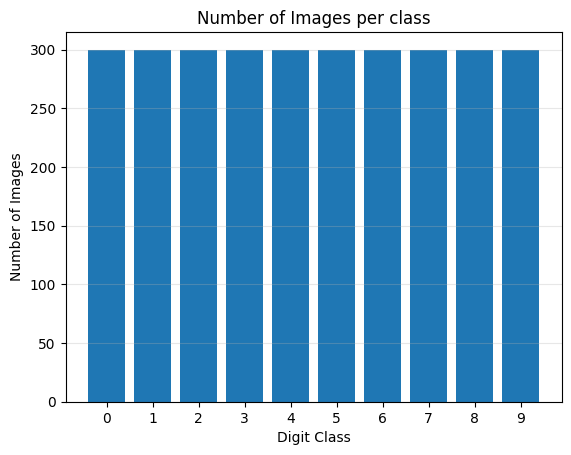

In [56]:
# Plot class distribution to check for imbalance data set
plt.Figure(figsize=(10, 5))
plt.bar(classes, class_count)
plt.title("Number of Images per class")
plt.xlabel("Digit Class")
plt.ylabel("Number of Images")
plt.xticks(classes)
plt.grid(axis='y', alpha=0.3)
plt.show()

## 2. Sample Images from Each Class

In [57]:
# let sample for 12 and 6
plt.Figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

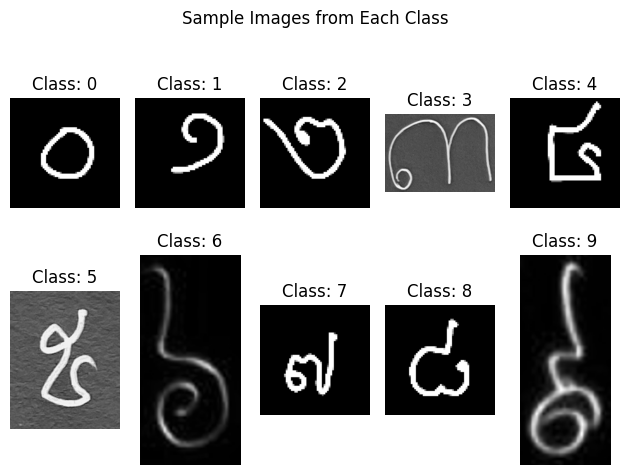

In [58]:
for i, cls in enumerate(classes):
    class_path = os.path.join(dataset_path, cls)
    images = os.listdir(class_path)

    # Get first image from each class
    imag_path = os.path.join(class_path, images[0]) # images[0] mean get first images
    img = cv2.imread(imag_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB


     # Display the image
    plt.subplot(2, 5, i+1)
    plt.imshow(img)
    plt.title(f"Class: {cls}")
    plt.axis('off')

plt.suptitle('Sample Images from Each Class')
plt.tight_layout()
plt.show()


## Display sample images from each class

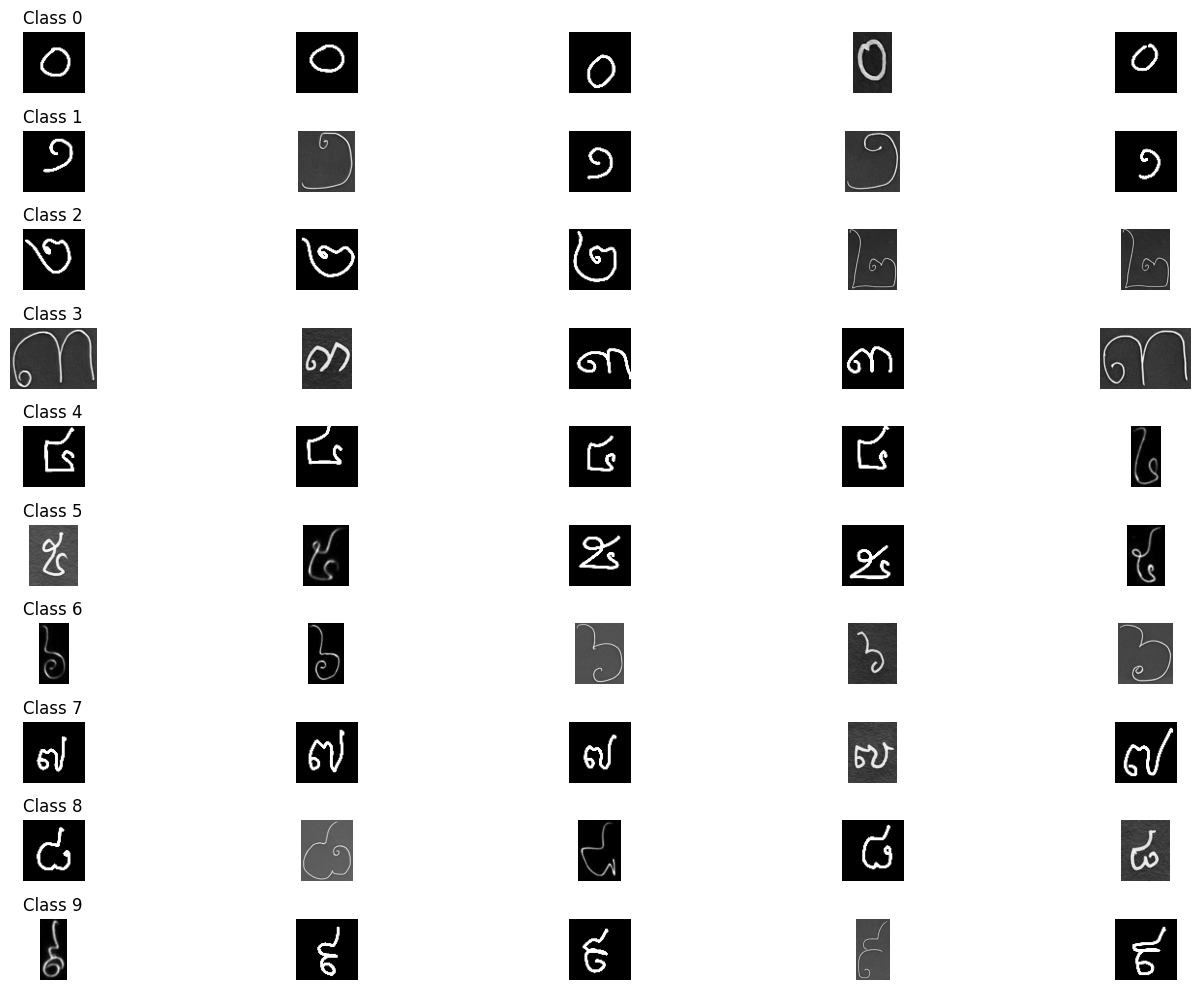

In [59]:

plt.figure(figsize=(15, 10))
for i, cls in enumerate(classes):
    class_path = os.path.join(dataset_path, cls)
    image_files = os.listdir(class_path)[:5]  # Get first 5 images
    
    for j, img_file in enumerate(image_files):
        img_path = os.path.join(class_path, img_file)
        img = plt.imread(img_path)
        
        plt.subplot(len(classes), 5, i*5 + j + 1)
        plt.imshow(img, cmap='gray')
        plt.axis('off')
        if j == 0:
            plt.title(f"Class {cls}")
            
plt.tight_layout()
plt.show()

## 3.Images processing

### Check image properties (dimensions)

In [60]:
# remember 
# ======plt.imread() load certain images format 0 1 it automatic convert====
# ======but cv2.imread() keep images originaly that it take image 0-255 scale=====

# ==== that why our picture data set have pixel 0 to 1 ====
sample_class = classes[0]
sample_path = os.path.join(dataset_path, sample_class)
sample_img = os.path.join(sample_path, os.listdir(sample_path)[0])
img = plt.imread(sample_img)

print(f"Image shape: {img.shape}")
print(f"Image dtype: {img.dtype}")
print(f"Min pixel value: {img.min()}")
print(f"Max pixel value: {img.max()}")
print(f"Mean pixel value: {img.mean()}")

# Check if all images have the same dimensions
dimensions = {}
for cls in classes:
    class_path = os.path.join(dataset_path, cls)
    for img_file in os.listdir(class_path):
        img_path = os.path.join(class_path, img_file)
        img = plt.imread(img_path)
        dim = img.shape
        dimensions[dim] = dimensions.get(dim, 0) + 1

print("Image dimensions distribution:")
for dim, count in dimensions.items():
    print(f"{dim}: {count} images")

Image shape: (64, 64, 4)
Image dtype: float32
Min pixel value: 0.0
Max pixel value: 1.0
Mean pixel value: 0.30054643750190735
Image dimensions distribution:
(64, 64, 4): 1500 images
(117, 74): 1 images
(130, 79): 1 images
(270, 244): 1 images
(124, 99): 2 images
(256, 193): 1 images
(398, 334): 1 images
(141, 107): 1 images
(110, 88): 1 images
(121, 97): 1 images
(153, 136): 1 images
(161, 110): 1 images
(352, 354): 1 images
(111, 89): 2 images
(249, 201): 1 images
(116, 83): 1 images
(120, 96): 3 images
(286, 202): 1 images
(112, 88): 1 images
(244, 248): 1 images
(224, 186): 1 images
(253, 217): 1 images
(154, 110): 1 images
(265, 230): 1 images
(96, 77): 1 images
(108, 74): 1 images
(129, 103): 1 images
(118, 94): 5 images
(223, 139): 1 images
(162, 107): 1 images
(251, 234): 1 images
(257, 209): 1 images
(115, 92): 3 images
(271, 183): 1 images
(162, 109): 1 images
(130, 84): 1 images
(161, 131): 1 images
(274, 195): 1 images
(134, 96): 2 images
(113, 90): 2 images
(171, 112): 1 im

### 3.1 Select one sample image

In [61]:
sample_class = classes[0]
sample_path = os.path.join(dataset_path, sample_class)
sample_img_name = os.listdir(sample_path)[0]
img_path = os.path.join(sample_path, sample_img_name)

print(f"Processing image from class: {sample_class}")
print(f"Image path: {img_path}")

Processing image from class: 0
Image path: ../dataset/0/0_075.png


### Step 1: load the original images

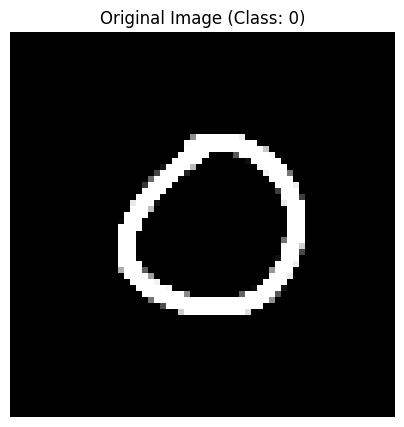

Original image size: 64x64 pixels


In [62]:
# Step 1: Load the original image
original_img = cv2.imread(img_path)
original_rgb = cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB)

# Display original image
plt.figure(figsize=(5, 5))
plt.imshow(original_rgb)
plt.title(f"Original Image (Class: {sample_class})")
plt.axis('off')
plt.show()

print(f"Original image size: {original_img.shape[1]}x{original_img.shape[0]} pixels")

###  Step 2: Resize the image to 28x28 and convert to grayscale image

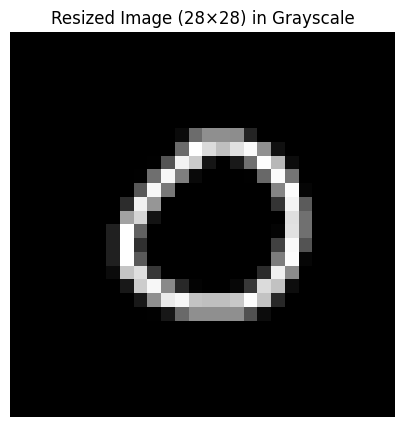

Image resized to 28x28 pixels and converted to grayscale
New shape: (28, 28)


In [63]:

resized = cv2.resize(original_img, (28, 28), interpolation=cv2.INTER_AREA)
# Convert the resized image to grayscale
resized_gray = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)

# Display the grayscale image
plt.figure(figsize=(5, 5))
plt.imshow(resized_gray, cmap='gray')
plt.title("Resized Image (28×28) in Grayscale")
plt.axis('off')
plt.show()

print("Image resized to 28x28 pixels and converted to grayscale")
print(f"New shape: {resized_gray.shape}")

### Step 3: Normalize pixel values from 0-255 to 0-1

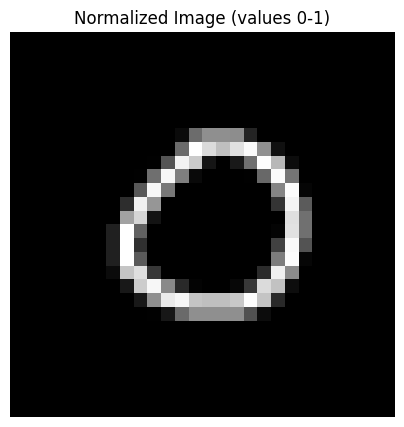

Pixel values normalized to range 0-1
Original values range: 0-255
Normalized values range: 0.0-1.0


In [64]:

normalized = resized / 255.0

# Display normalized image properly
plt.figure(figsize=(5, 5))
# For single-channel images use cmap='gray'
# For 3-channel images, convert to RGB first
if len(normalized.shape) == 2:
    plt.imshow(normalized, cmap='gray')
else:
    # Convert to RGB for display
    normalized_rgb = cv2.cvtColor((normalized*255).astype(np.uint8), cv2.COLOR_BGR2RGB)
    plt.imshow(normalized_rgb)
    
plt.title("Normalized Image (values 0-1)")
plt.axis('off')
plt.show()

print("Pixel values normalized to range 0-1")
print(f"Original values range: 0-255")
print(f"Normalized values range: {normalized.min():.1f}-{normalized.max():.1f}")

###  Step4: Show the 3 different

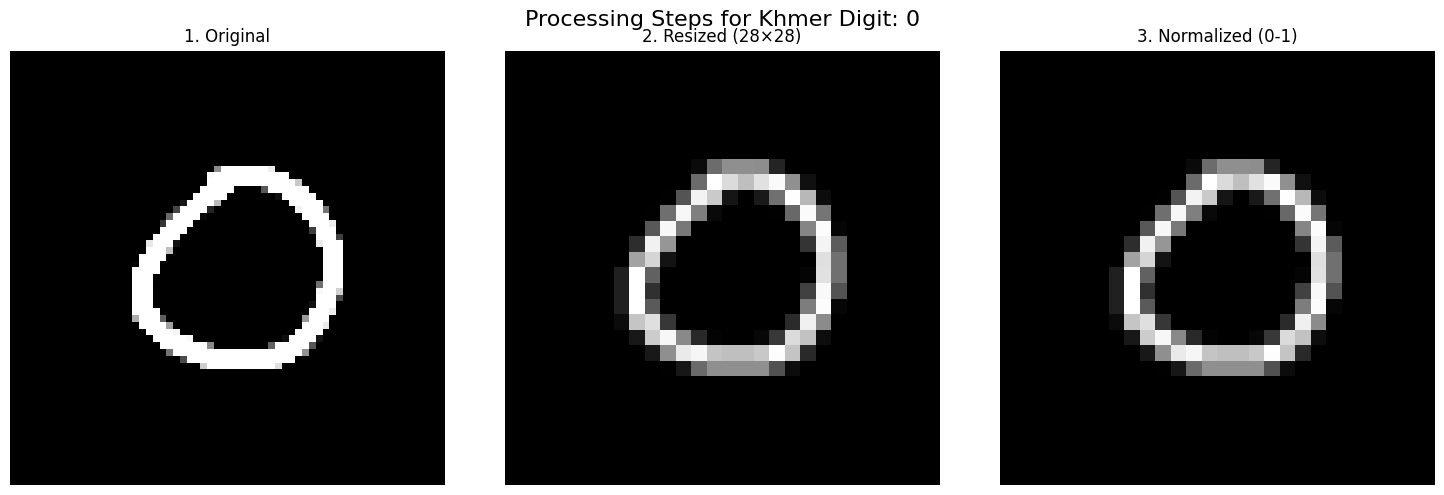

In [65]:

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Original image
axes[0].imshow(original_rgb)
axes[0].set_title("1. Original")
axes[0].axis('off')

# Resized image
axes[1].imshow(normalized)
axes[1].set_title("2. Resized (28×28)")
axes[1].axis('off')

# Normalized image - properly convert for display
axes[2].imshow(normalized, cmap='gray')
    
axes[2].set_title("3. Normalized (0-1)")
axes[2].axis('off')

plt.suptitle(f"Processing Steps for Khmer Digit: {sample_class}", fontsize=16)
plt.tight_layout()
plt.show()

###  Process one image from each class (digits 0-9)

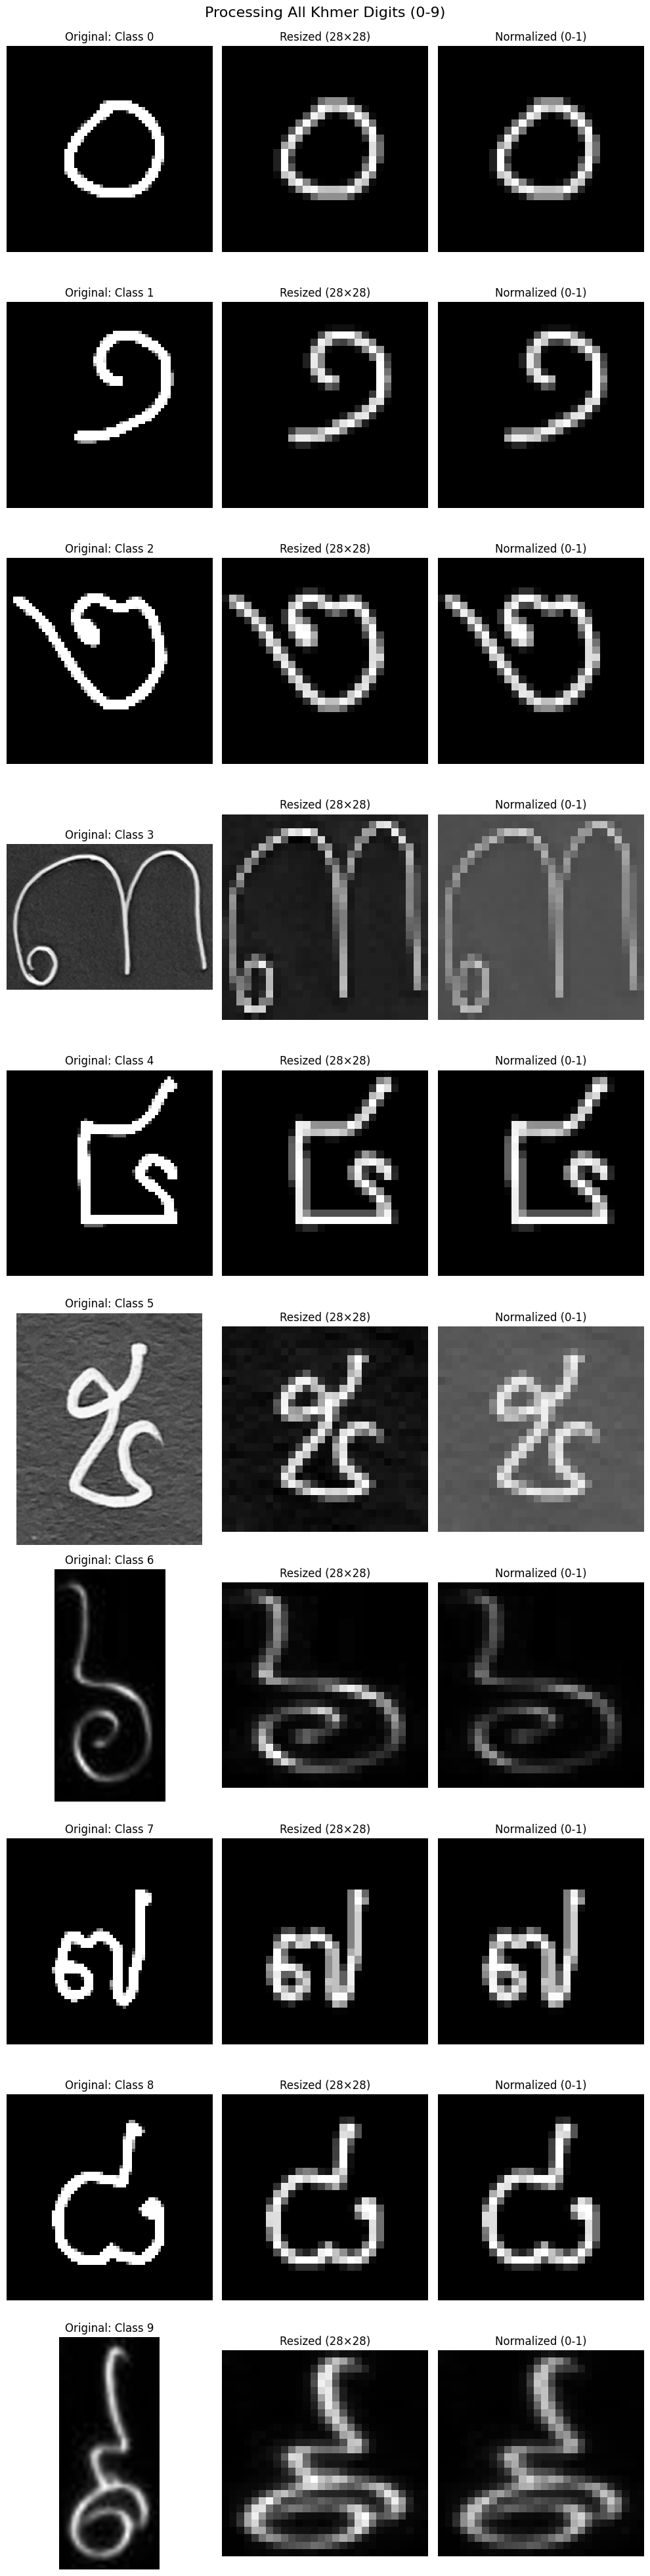

Processed Khmer digit classes in order: ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']


In [66]:

plt.figure(figsize=(10, 40))  # Taller figure to fit all 10 digits

# Process all classes in order
for i, digit_class in enumerate(classes):
    # Select an image from this class
    class_path = os.path.join(dataset_path, digit_class)
    img_name = os.listdir(class_path)[0]  # Just take first image
    img_path = os.path.join(class_path, img_name)
    
    # Process the image
    # Step 1: Load the image
    original = cv2.imread(img_path)
    original_gray = cv2.cvtColor(original, cv2.COLOR_BGR2GRAY)
    
    # Step 2: Resize the image
    resized = cv2.resize(original, (28, 28), interpolation=cv2.INTER_AREA)
    resized_gray = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
    
    # Step 3: Normalize the image
    normalized = resized / 255.0
    
    # Display original image
    plt.subplot(10, 3, i*3+1)
    plt.imshow(original_gray, cmap = 'gray')
    plt.title(f"Original: Class {digit_class}")
    plt.axis('off')
    
    # Display resized image
    plt.subplot(10, 3, i*3+2)
    plt.imshow(resized_gray, cmap = 'gray')
    plt.title(f"Resized (28×28)")
    plt.axis('off')
    
    # Display normalized image
    plt.subplot(10, 3, i*3+3)
    plt.imshow(normalized, cmap='gray')

    plt.title(f"Normalized (0-1)")
    plt.axis('off')

plt.tight_layout()
plt.suptitle("Processing All Khmer Digits (0-9)", fontsize=16)
plt.subplots_adjust(top=0.97)
plt.show()

# Print all processed classes in order
print("Processed Khmer digit classes in order:", classes)

## 4.Show variations within a single class

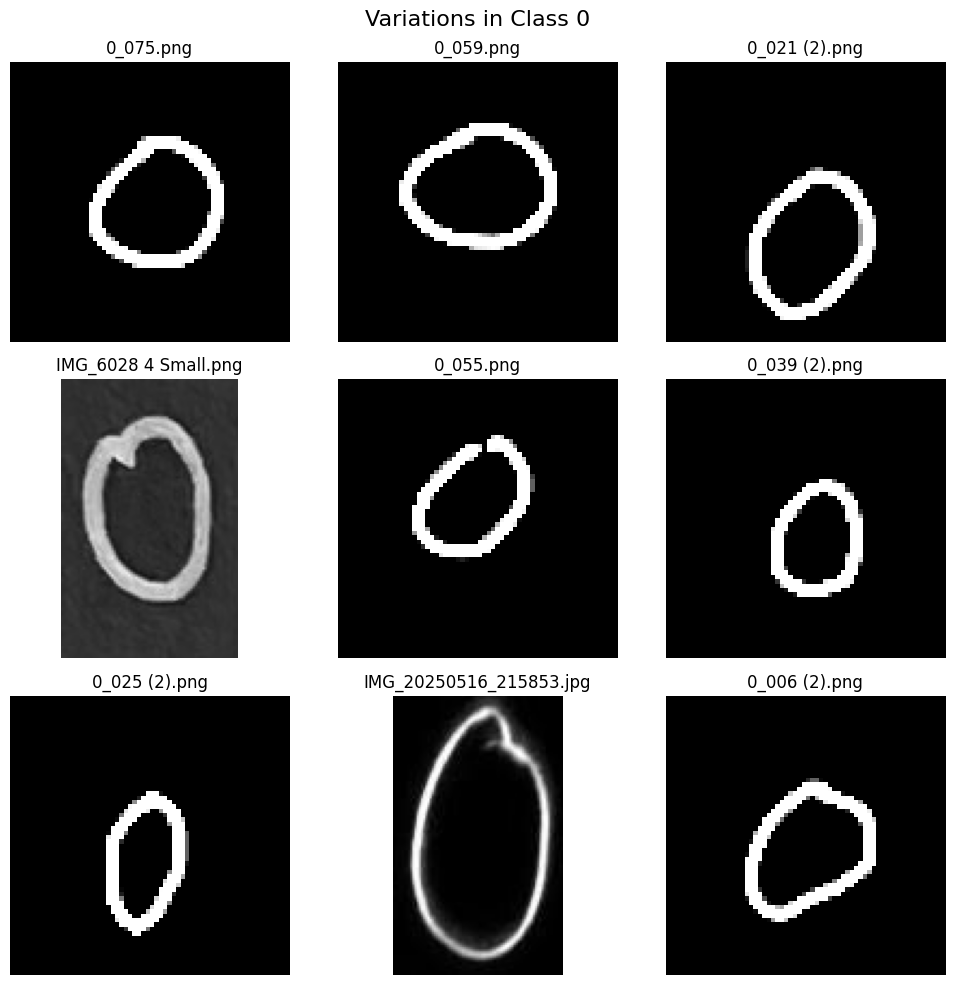

In [67]:

selected_class = classes[0]  # Pick one class
class_path = os.path.join(dataset_path, selected_class)
images = os.listdir(class_path)[:9]  # Show 9 examples

plt.figure(figsize=(10, 10))
for i, img_name in enumerate(images):
    img_path = os.path.join(class_path, img_name)
    img = cv2.imread(img_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    plt.subplot(3, 3, i+1)
    plt.imshow(img_rgb)
    plt.title(f"{img_name}")
    plt.axis('off')
    
plt.suptitle(f"Variations in Class {selected_class}", fontsize=16)
plt.tight_layout()
plt.show()

# 5.Pre Model

In [68]:
from tqdm import tqdm

training_data = []
IMG_SIZE = 28

def create_training_data():
    for category in classes:

        path = os.path.join(dataset_path,category)
        class_num = classes.index(category)

        for img in tqdm(os.listdir(path)):
            try:
                img_path = os.path.join(path, img)
                img_array = cv2.imread(img_path, cv2.IMREAD_COLOR)
                img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2GRAY)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass

create_training_data()

print(len(training_data))

100%|██████████| 300/300 [00:00<00:00, 1507.94it/s]

3000


In [69]:
import random
random.shuffle(training_data)

In [70]:
for sample in training_data[:10]:
    print(sample[1])

2
0
9
0
2
5
8
6
2
6


In [71]:
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)

In [72]:
from tensorflow.keras.utils import to_categorical # type: ignore

In [73]:
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
X = X / 255.0
X[100]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

In [74]:
y = to_categorical(y, num_classes=10)
y

array([[0., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.]])

In [75]:
from tensorflow.keras.models import Sequential # type: ignore
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, LeakyReLU # type: ignore

# Define the CNN model
model = Sequential()

# First Convolutional Layer
model.add(Conv2D(filters=8, kernel_size=(5, 5), strides=(1, 1), padding='same', input_shape=(28, 28, 1)))
model.add(LeakyReLU(alpha=0.1))

# First Max Pooling Layer
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

# Second Convolutional Layer
model.add(Conv2D(filters=16, kernel_size=(5, 5), strides=(1, 1), padding='same'))
model.add(LeakyReLU(alpha=0.1))

# Second Max Pooling Layer
model.add(MaxPooling2D(pool_size=(5, 5), strides=(2, 2)))

# Flattening Layer
model.add(Flatten())

# Fully Connected Output Layer
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X, y, epochs=10, validation_split=0.2)

model.summary()

Epoch 1/10


/home/mondolreal/MondolReal/Scbool/Mini/khmer-number-recognition/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/home/mondolreal/MondolReal/Scbool/Mini/khmer-number-recognition/.venv/lib/python3.12/site-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


42/75 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1648 - loss: 2.2930

E0000 00:00:1747675547.860481  235942 meta_optimizer.cc:966] remapper failed: INVALID_ARGUMENT: Mutation::Apply error: fanout 'StatefulPartitionedCall/gradient_tape/sequential_2_1/leaky_re_lu_4_1/LeakyRelu/LeakyReluGrad' exist for missing node 'StatefulPartitionedCall/sequential_2_1/conv2d_4_1/BiasAdd'.


75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.2162 - loss: 2.2362 - val_accuracy: 0.5783 - val_loss: 1.6380
Epoch 2/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6562 - loss: 1.2839 - val_accuracy: 0.8350 - val_loss: 0.6895
Epoch 3/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8582 - loss: 0.5747 - val_accuracy: 0.8883 - val_loss: 0.4554
Epoch 4/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8989 - loss: 0.3786 - val_accuracy: 0.9267 - val_loss: 0.3309
Epoch 5/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9247 - loss: 0.2869 - val_accuracy: 0.9117 - val_loss: 0.3030
Epoch 6/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9505 - loss: 0.2249 - val_accuracy: 0.9117 - val_loss: 0.2879
Epoch 7/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9571 - loss: 0.1776 - val_accuracy: 0.9450 - val_loss: 0.2133
Epoch 8/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9640 - loss: 0.1406 - val_accuracy: 0.9533 - val_loss: 0.1845
Epo

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 28, 28, 8)      │           208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_4 (LeakyReLU)       │ (None, 28, 28, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 14, 14, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 14, 14, 16)     │         3,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_5 (LeakyReLU)       │ (None, 14, 14, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 5, 5, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 400)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         4,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,304 (87.13 KB)

 Trainable params: 7,434 (29.04 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 14,870 (58.09 KB)

In [76]:
model.save("digit_model.keras") 

In [77]:
IMG_SIZE = 28
def prepare_image(filepath):
    img_array = cv2.imread(filepath, cv2.IMREAD_COLOR)
    # Convert to grayscale
    img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2GRAY)
    # Resize the image to 28x28 pixels
    resized = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    normalized = resized / 255.0
    reshaped = normalized.reshape(-1, IMG_SIZE, IMG_SIZE, 1)
    return reshaped


### Test images from outside data set

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


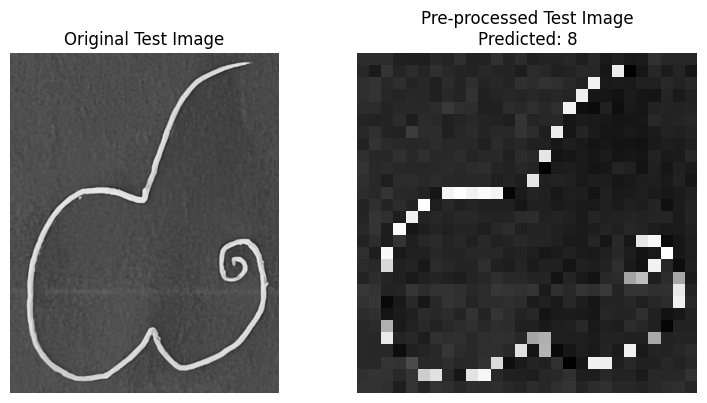

In [80]:
# Load original image (in grayscale for fair comparison)
original_img = cv2.imread("/home/mondolreal/MondolReal/Scbool/Mini/khmer-number-recognition/Test image/8/Capture04.PNG", cv2.IMREAD_COLOR_RGB)

# Prepare image for model
image = prepare_image("/home/mondolreal/MondolReal/Scbool/Mini/khmer-number-recognition/Test image/8/Capture04.PNG")
model = tf.keras.models.load_model('/home/mondolreal/MondolReal/Scbool/Mini/khmer-number-recognition/notebooks/digit_model.keras')
prediction = model.predict(image)
predicted_label = np.argmax(prediction)

# Plot side by side
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
axes[0].imshow(original_img, cmap='gray')
axes[0].set_title("Original Test Image")
axes[0].axis('off')

axes[1].imshow(image[0].reshape(28, 28), cmap='gray')
axes[1].set_title(f"Pre-processed Test Image\nPredicted: {predicted_label}")
axes[1].axis('off')

plt.tight_layout()
plt.show()

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        20
           2       0.95      1.00      0.98        20
           3       1.00      1.00      1.00        20
           4       0.78      0.90      0.84        20
           5       1.00      0.85      0.92        20
           6       1.00      1.00      1.00        20
           7       1.00      0.90      0.95        20
           8       0.76      0.80      0.78        20
           9       1.00      1.00      1.00        20

    accuracy                           0.94       200
   macro avg       0.95      0.95      0.95       200
weighted avg       0.95      0.94      0.95       200



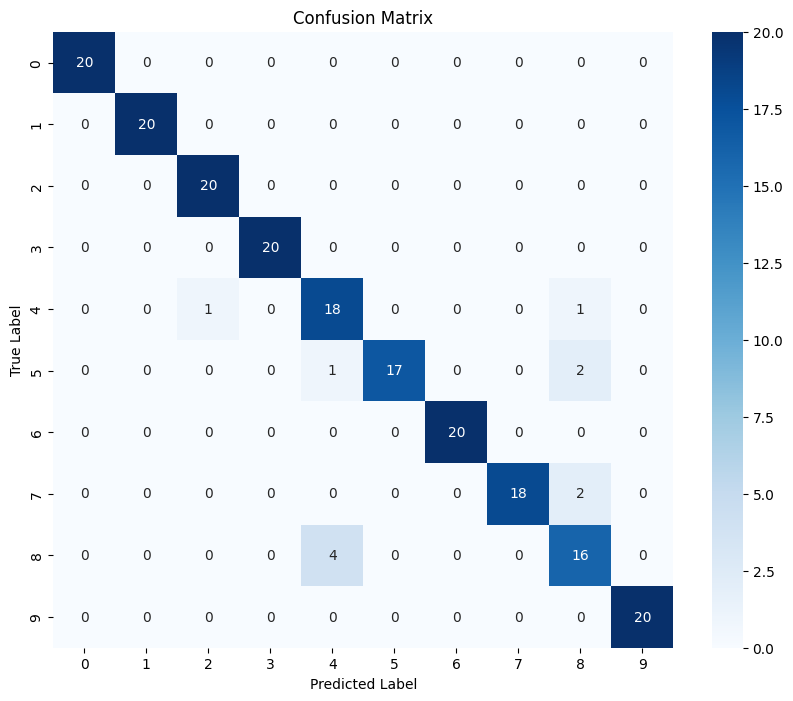


Total incorrect predictions: 11


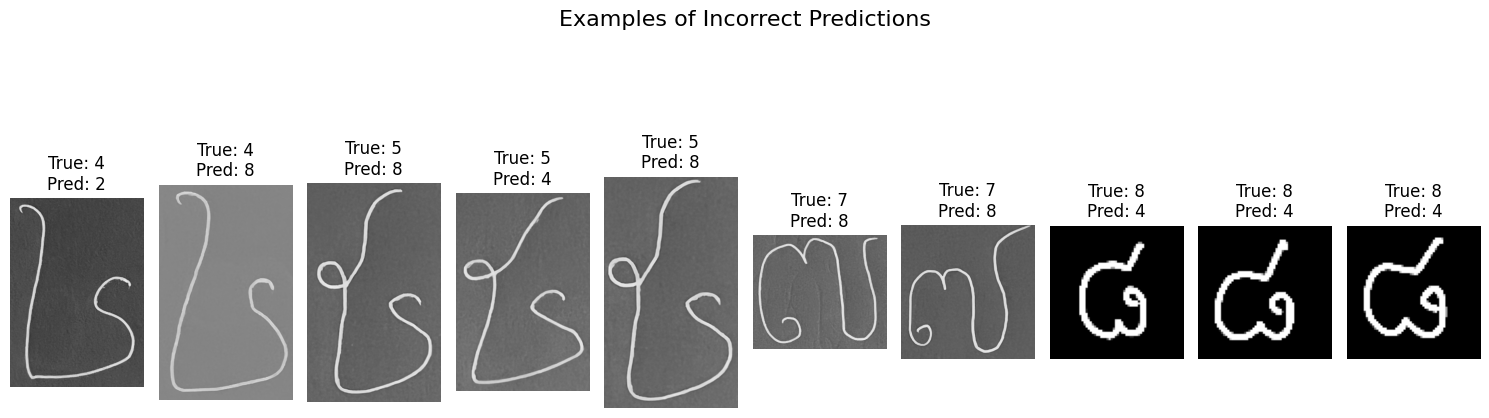

In [81]:
import os
import cv2
import numpy as np
import tensorflow as tf
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# === Step 1: Define preprocessing function ===
def preprocess_image(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    resized = cv2.resize(gray, (28, 28))
    normalized = resized / 255.0
    return normalized

# === Step 2: Load test images and labels ===
test_dir = r'/home/mondolreal/MondolReal/Scbool/Mini/khmer-number-recognition/Test image'
X_test, y_test, image_paths = [], [], []
class_names = sorted(os.listdir(test_dir))

for label in class_names:
    class_path = os.path.join(test_dir, label)
    for img_name in os.listdir(class_path):
        img_path = os.path.join(class_path, img_name)
        img = preprocess_image(img_path)
        X_test.append(img)
        y_test.append(int(label))
        image_paths.append(img_path)

X_test = np.array(X_test).reshape(-1, 28, 28, 1)
y_test = np.array(y_test)

# === Step 3: Load the trained model ===
model = tf.keras.models.load_model(r'/home/mondolreal/MondolReal/Scbool/Mini/khmer-number-recognition/notebooks/digit_model.keras')

# === Step 4: Make predictions ===
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

# === Step 5: Classification metrics ===
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=class_names))

# === Step 6: Confusion Matrix ===
conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# === Step 7: Show incorrect predictions ===
incorrect_indices = np.where(y_pred != y_test)[0]

print(f"\nTotal incorrect predictions: {len(incorrect_indices)}")

# Show a few incorrect samples
num_to_display = min(10, len(incorrect_indices))
plt.figure(figsize=(15, 5))

for i, idx in enumerate(incorrect_indices[:num_to_display]):
    img = cv2.imread(image_paths[idx])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    plt.subplot(1, num_to_display, i+1)
    plt.imshow(img)
    plt.title(f'True: {y_test[idx]}\nPred: {y_pred[idx]}')
    plt.axis('off')

plt.tight_layout()
plt.suptitle('Examples of Incorrect Predictions', fontsize=16)
plt.subplots_adjust(top=0.8)
plt.show()
